In [ ]:
# import libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from scipy.optimize import minimize
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from tqdm import notebook

import seaborn as sns

# LOAD DATAFRAME and INITIAL EXPLORATION

---

In [ ]:
# loads dataframe; prints head
pisa_df = pd.read_csv("https://raw.githubusercontent.com/babnigg/DATA11900/main/economics_and_education_dataset_CSV.csv")
pisa_df.head()

,index_code,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
0,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,BOY,527.0
1,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,GIRL,522.0
2,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,TOT,524.0
3,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,BOY,527.0
4,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,GIRL,513.0


In [ ]:
# filters out dataframe to only include total sex aggregate; prints info and describes numerical variables
agg = "TOT"
pisa_df_tot = pisa_df[pisa_df["sex"]==agg]

pisa_df_tot.info()
pisa_df_tot.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 2 to 633
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index_code                             214 non-null    object 
 1   expenditure_on _education_pct_gdp      202 non-null    float64
 2   mortality_rate_infant                  214 non-null    float64
 3   gini_index                             181 non-null    float64
 4   gdp_per_capita_ppp                     214 non-null    float64
 5   inflation_consumer_prices              214 non-null    float64
 6   intentional_homicides                  187 non-null    float64
 7   unemployment                           214 non-null    float64
 8   gross_fixed_capital_formation          214 non-null    float64
 9   population_density                     214 non-null    float64
 10  suicide_mortality_rate                 214 non-null    float64
 11  tax_re

,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,time,rating
count,202.000000,214.000000,181.000000,214.000000,214.000000,187.000000,214.000000,214.000000,214.000000,214.000000,198.000000,198.000000,37.000000,214.000000,214.000000,214.000000,214.000000
mean,5.237384,5.062150,33.411050,36176.526959,2.300823,3.119124,7.643659,22.507161,133.327098,13.584112,20.119590,27.827355,9.452505,5.939307,77.345145,2010.808411,489.242991
std,1.105318,4.090917,6.816531,16451.684140,2.742357,6.122298,4.021760,3.942642,133.840583,6.282140,5.748563,13.303791,2.721759,1.755618,11.020002,5.106906,37.238186
min,3.040150,1.900000,24.400000,9587.557951,-4.478103,0.000000,2.246000,10.770040,2.567036,2.200000,7.903518,7.173176,1.895130,2.413703,51.758000,2003.000000,356.000000
25%,4.460890,3.000000,28.100000,26081.142138,0.799862,0.833583,4.892500,20.210197,30.425942,9.675000,15.526577,17.681421,7.847910,4.473900,68.733000,2006.000000,482.000000
50%,5.058085,3.700000,32.700000,34305.514059,1.980056,1.095505,6.843000,22.454439,101.872663,12.900000,20.951774,25.383772,9.916870,6.045355,79.628500,2012.000000,495.000000
75%,5.796320,5.100000,35.400000,42993.833915,2.991248,1.842371,9.333500,24.296864,192.362949,16.925000,24.172369,34.128627,11.462780,7.382606,85.680750,2015.000000,512.750000
max,8.448880,25.300000,57.600000,116498.512081,21.602438,29.581371,24.981000,36.800286,528.969011,34.200000,33.921619,65.517310,15.058720,9.276339,98.001000,2018.000000,554.000000


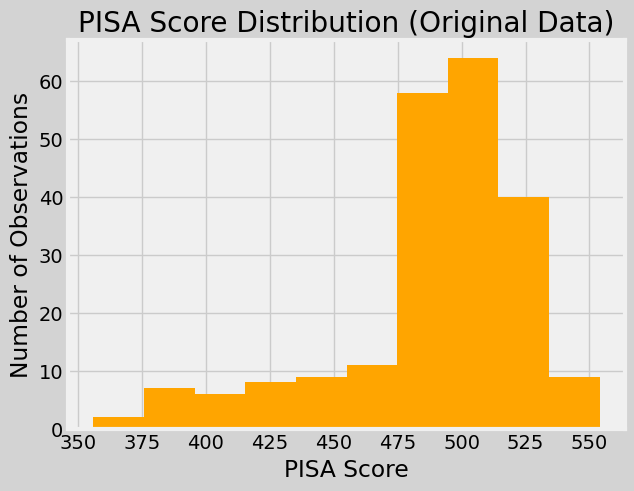

In [ ]:
# plots histogram of PISA score distribution in original data
plt.figure().set_facecolor("lightgrey")
plt.hist(pisa_df_tot.rating, color = "orange")
plt.title("PISA Score Distribution (Original Data)")
plt.ylabel("Number of Observations")
plt.xlabel("PISA Score")
plt.show()

# DATA CLEANING and EXPLORATION

---

In [ ]:
# counts and prints number of NA values per column
np.sum(pisa_df_tot.isna(),axis=0)

index_code                                 0
expenditure_on _education_pct_gdp         12
mortality_rate_infant                      0
gini_index                                33
gdp_per_capita_ppp                         0
inflation_consumer_prices                  0
intentional_homicides                     27
unemployment                               0
gross_fixed_capital_formation              0
population_density                         0
suicide_mortality_rate                     0
tax_revenue                               16
taxes_on_income_profits_capital           16
alcohol_consumption_per_capita           177
government_health_expenditure_pct_gdp      0
urban_population_pct_total                 0
country                                    0
time                                       0
sex                                        0
rating                                     0
dtype: int64

In [ ]:
# defining function to impute data with the mean for the column
def fill_missing_with_mean(group):
  '''fill the missing values with the mean of each feature (column) for each country.'''
  columns_to_fill = ['expenditure_on _education_pct_gdp', 'gini_index', 'intentional_homicides',
                       'tax_revenue', 'taxes_on_income_profits_capital', 'alcohol_consumption_per_capita']
  for column in columns_to_fill:
      group[column] = group[column].fillna(group[column].mean())
  return group

# apply the function to each group (country)
pisa_df_tot = pisa_df_tot.groupby('country', group_keys=False).apply(fill_missing_with_mean)

# glance at data head after imputing
display(pisa_df_tot.head())

# counts and prints number of NA values per column after imputing
np.sum(pisa_df_tot.isna(),axis=0)

,index_code,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
2,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,10.3903,5.623778,84.343,AUS,2003,TOT,524.0
5,AUS-2006,4.738430,4.7,33.9,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,10.3903,5.719998,84.700,AUS,2006,TOT,520.0
8,AUS-2009,5.081320,4.2,33.9,40312.395119,1.771117,1.214170,5.565,27.601846,2.823588,11.2,22.021006,64.951075,10.3903,6.244110,85.063,AUS,2009,TOT,514.0
11,AUS-2012,4.866670,3.6,33.9,42866.604330,1.762780,1.069106,5.225,27.404168,2.959200,11.7,21.097483,65.517310,10.3903,6.179476,85.402,AUS,2012,TOT,504.0
14,AUS-2015,5.315520,3.3,33.9,46292.095439,1.508367,0.990754,6.055,26.202336,3.100113,13.2,21.866424,64.893433,10.3903,7.234067,85.701,AUS,2015,TOT,494.0


index_code                                0
expenditure_on _education_pct_gdp         0
mortality_rate_infant                     0
gini_index                               12
gdp_per_capita_ppp                        0
inflation_consumer_prices                 0
intentional_homicides                     6
unemployment                              0
gross_fixed_capital_formation             0
population_density                        0
suicide_mortality_rate                    0
tax_revenue                               6
taxes_on_income_profits_capital           6
alcohol_consumption_per_capita            2
government_health_expenditure_pct_gdp     0
urban_population_pct_total                0
country                                   0
time                                      0
sex                                       0
rating                                    0
dtype: int64

Since there are some countries that don't have any entry for certain variables we can just drop those countries.  
Countries: BEL, JPN, NZL, CRI, LTU.  
We also choose to drop countries with the characteristically low PISA scores in comparison to other countries in dataset to normalize the score distribution.  
Countries: MEX, BRA, CHL, TUR, COL

In [ ]:
# dropping countries with lone NaN values
# last 5 countires in list are lowest scoring countries
countries_to_drop = ['BEL', 'JPN', 'NZL','CRI','LTU','MEX','BRA','CHL','TUR','COL']
pisa_df_tot = pisa_df_tot.drop(pisa_df_tot[pisa_df_tot['country'].isin(countries_to_drop)].index)

# 'sex' is a redundant column as we already control the dataset on sex='TOT'
pisa_df_tot = pisa_df_tot.drop(['sex'],axis=1)

# informative 'index_code' column can be used to replace default index
pisa_df_tot.reset_index(drop=True,inplace=True)
pisa_df_tot.set_index('index_code',inplace=True)

# printing remaining number of countries in the dataset
print("Number of remaining countries in dataset:",len(pisa_df_tot.country.unique()))
print("\n")

# glance at data head after cleaning
display(pisa_df_tot.head())

# counts and prints number of NA values per column after removing countries
print(np.sum(pisa_df_tot.isna(),axis=0))

Number of remaining countries in dataset: 29




,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,rating
index_code,,,,,,,,,,,,,,,,,,
AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,10.3903,5.623778,84.343,AUS,2003,524.0
AUS-2006,4.738430,4.7,33.9,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,10.3903,5.719998,84.700,AUS,2006,520.0
AUS-2009,5.081320,4.2,33.9,40312.395119,1.771117,1.214170,5.565,27.601846,2.823588,11.2,22.021006,64.951075,10.3903,6.244110,85.063,AUS,2009,514.0
AUS-2012,4.866670,3.6,33.9,42866.604330,1.762780,1.069106,5.225,27.404168,2.959200,11.7,21.097483,65.517310,10.3903,6.179476,85.402,AUS,2012,504.0
AUS-2015,5.315520,3.3,33.9,46292.095439,1.508367,0.990754,6.055,26.202336,3.100113,13.2,21.866424,64.893433,10.3903,7.234067,85.701,AUS,2015,494.0


expenditure_on _education_pct_gdp        0
mortality_rate_infant                    0
gini_index                               0
gdp_per_capita_ppp                       0
inflation_consumer_prices                0
intentional_homicides                    0
unemployment                             0
gross_fixed_capital_formation            0
population_density                       0
suicide_mortality_rate                   0
tax_revenue                              0
taxes_on_income_profits_capital          0
alcohol_consumption_per_capita           0
government_health_expenditure_pct_gdp    0
urban_population_pct_total               0
country                                  0
time                                     0
rating                                   0
dtype: int64


# EXPLORATION  
---

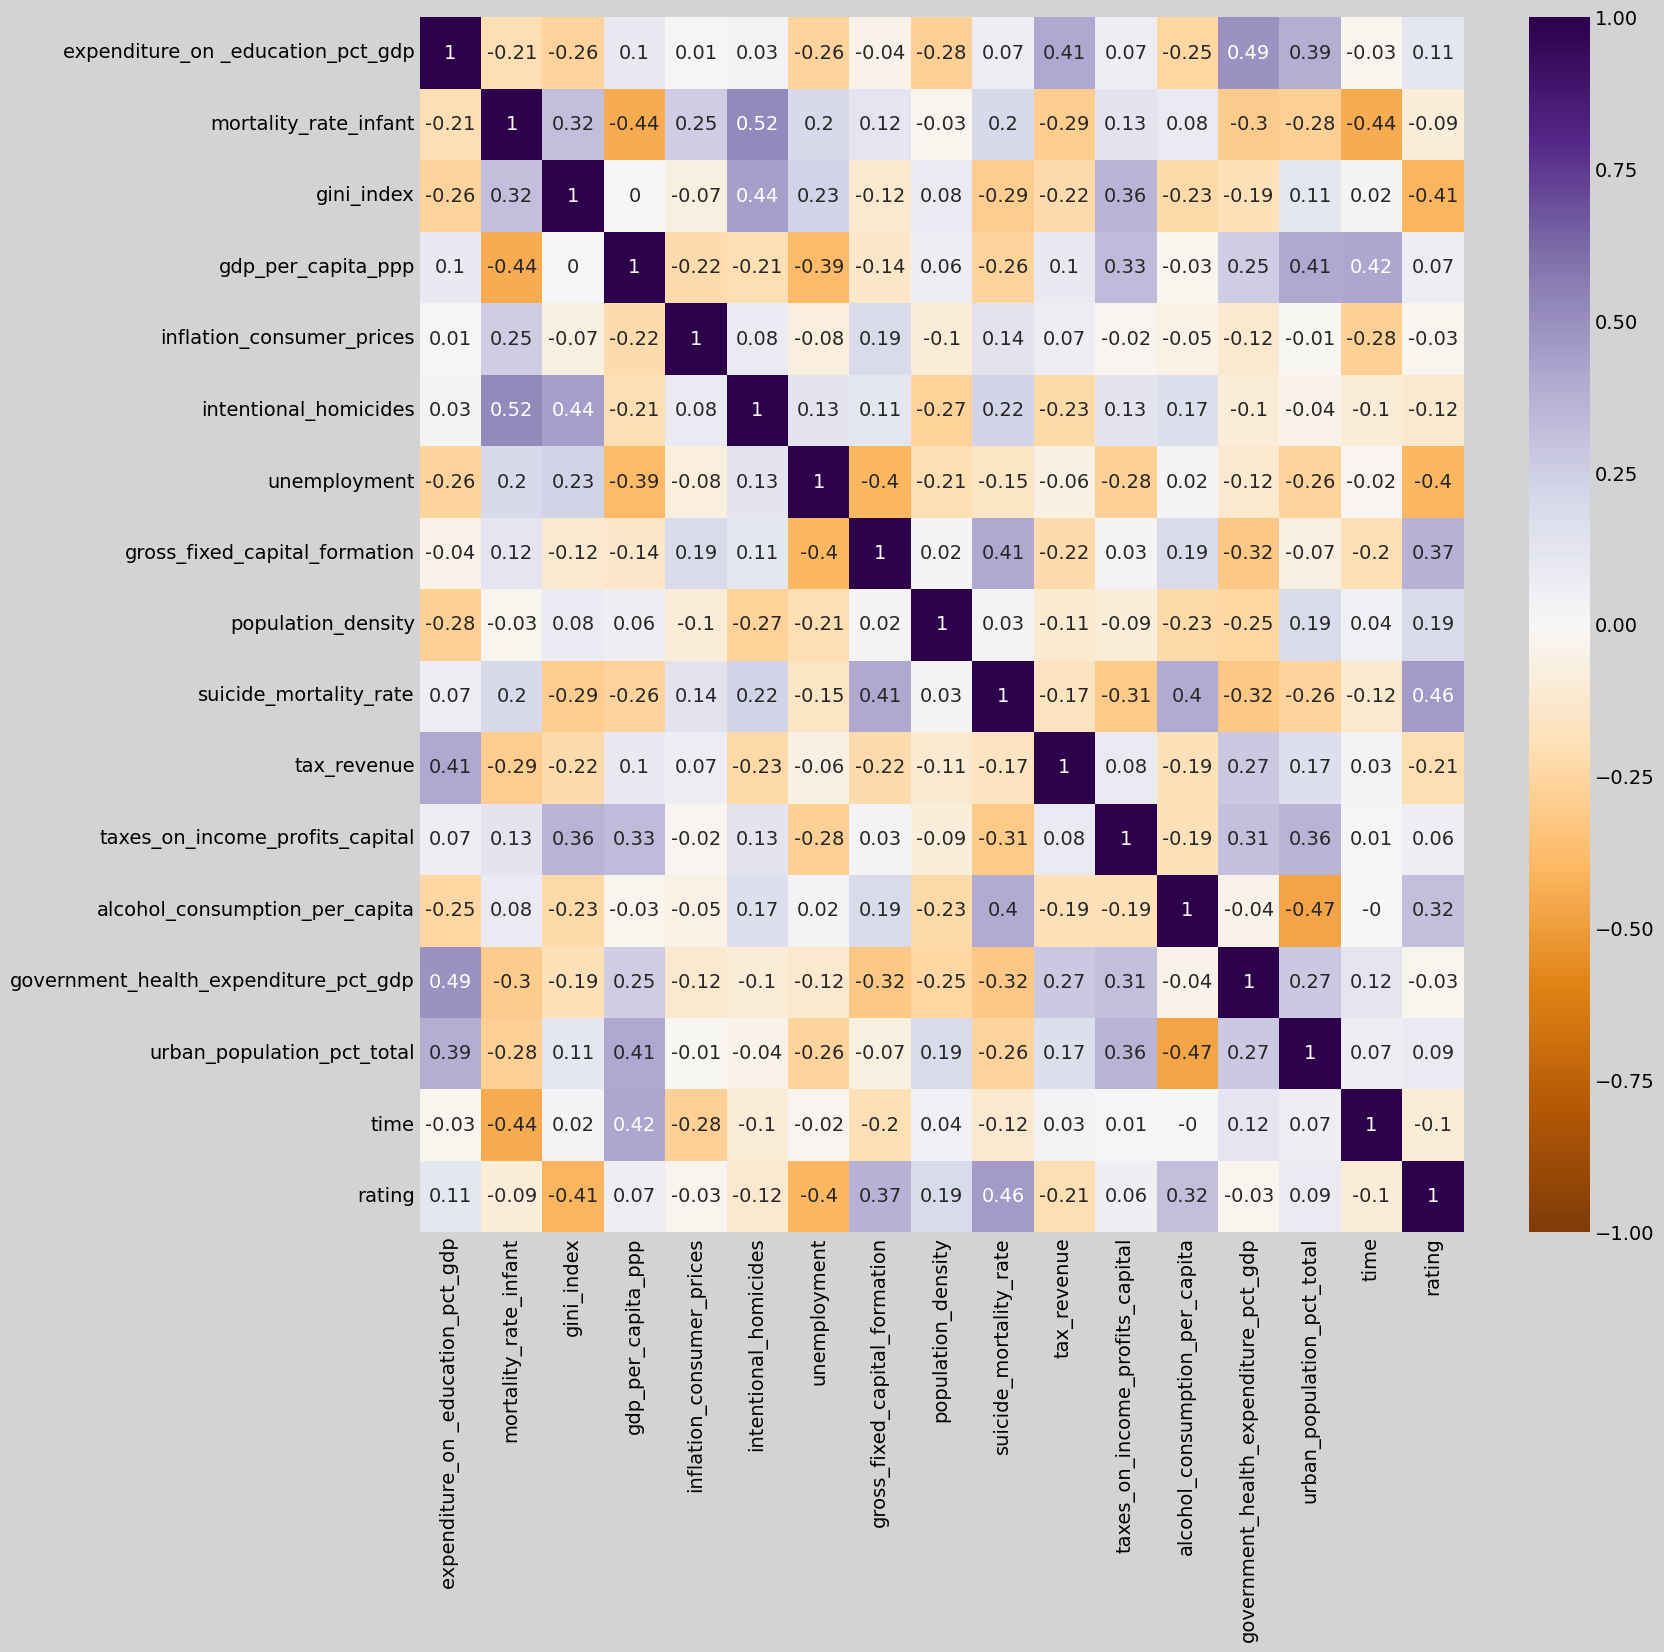

In [ ]:
# plot correlation matrix with all numerical variables
corr_matrix = pisa_df_tot.corr(numeric_only=True).round(2)
plt.figure(figsize=(15,15)).set_facecolor("lightgrey")
sns.heatmap(data=corr_matrix,annot=True,vmin=-1,vmax=1,cmap="PuOr")
plt.show()

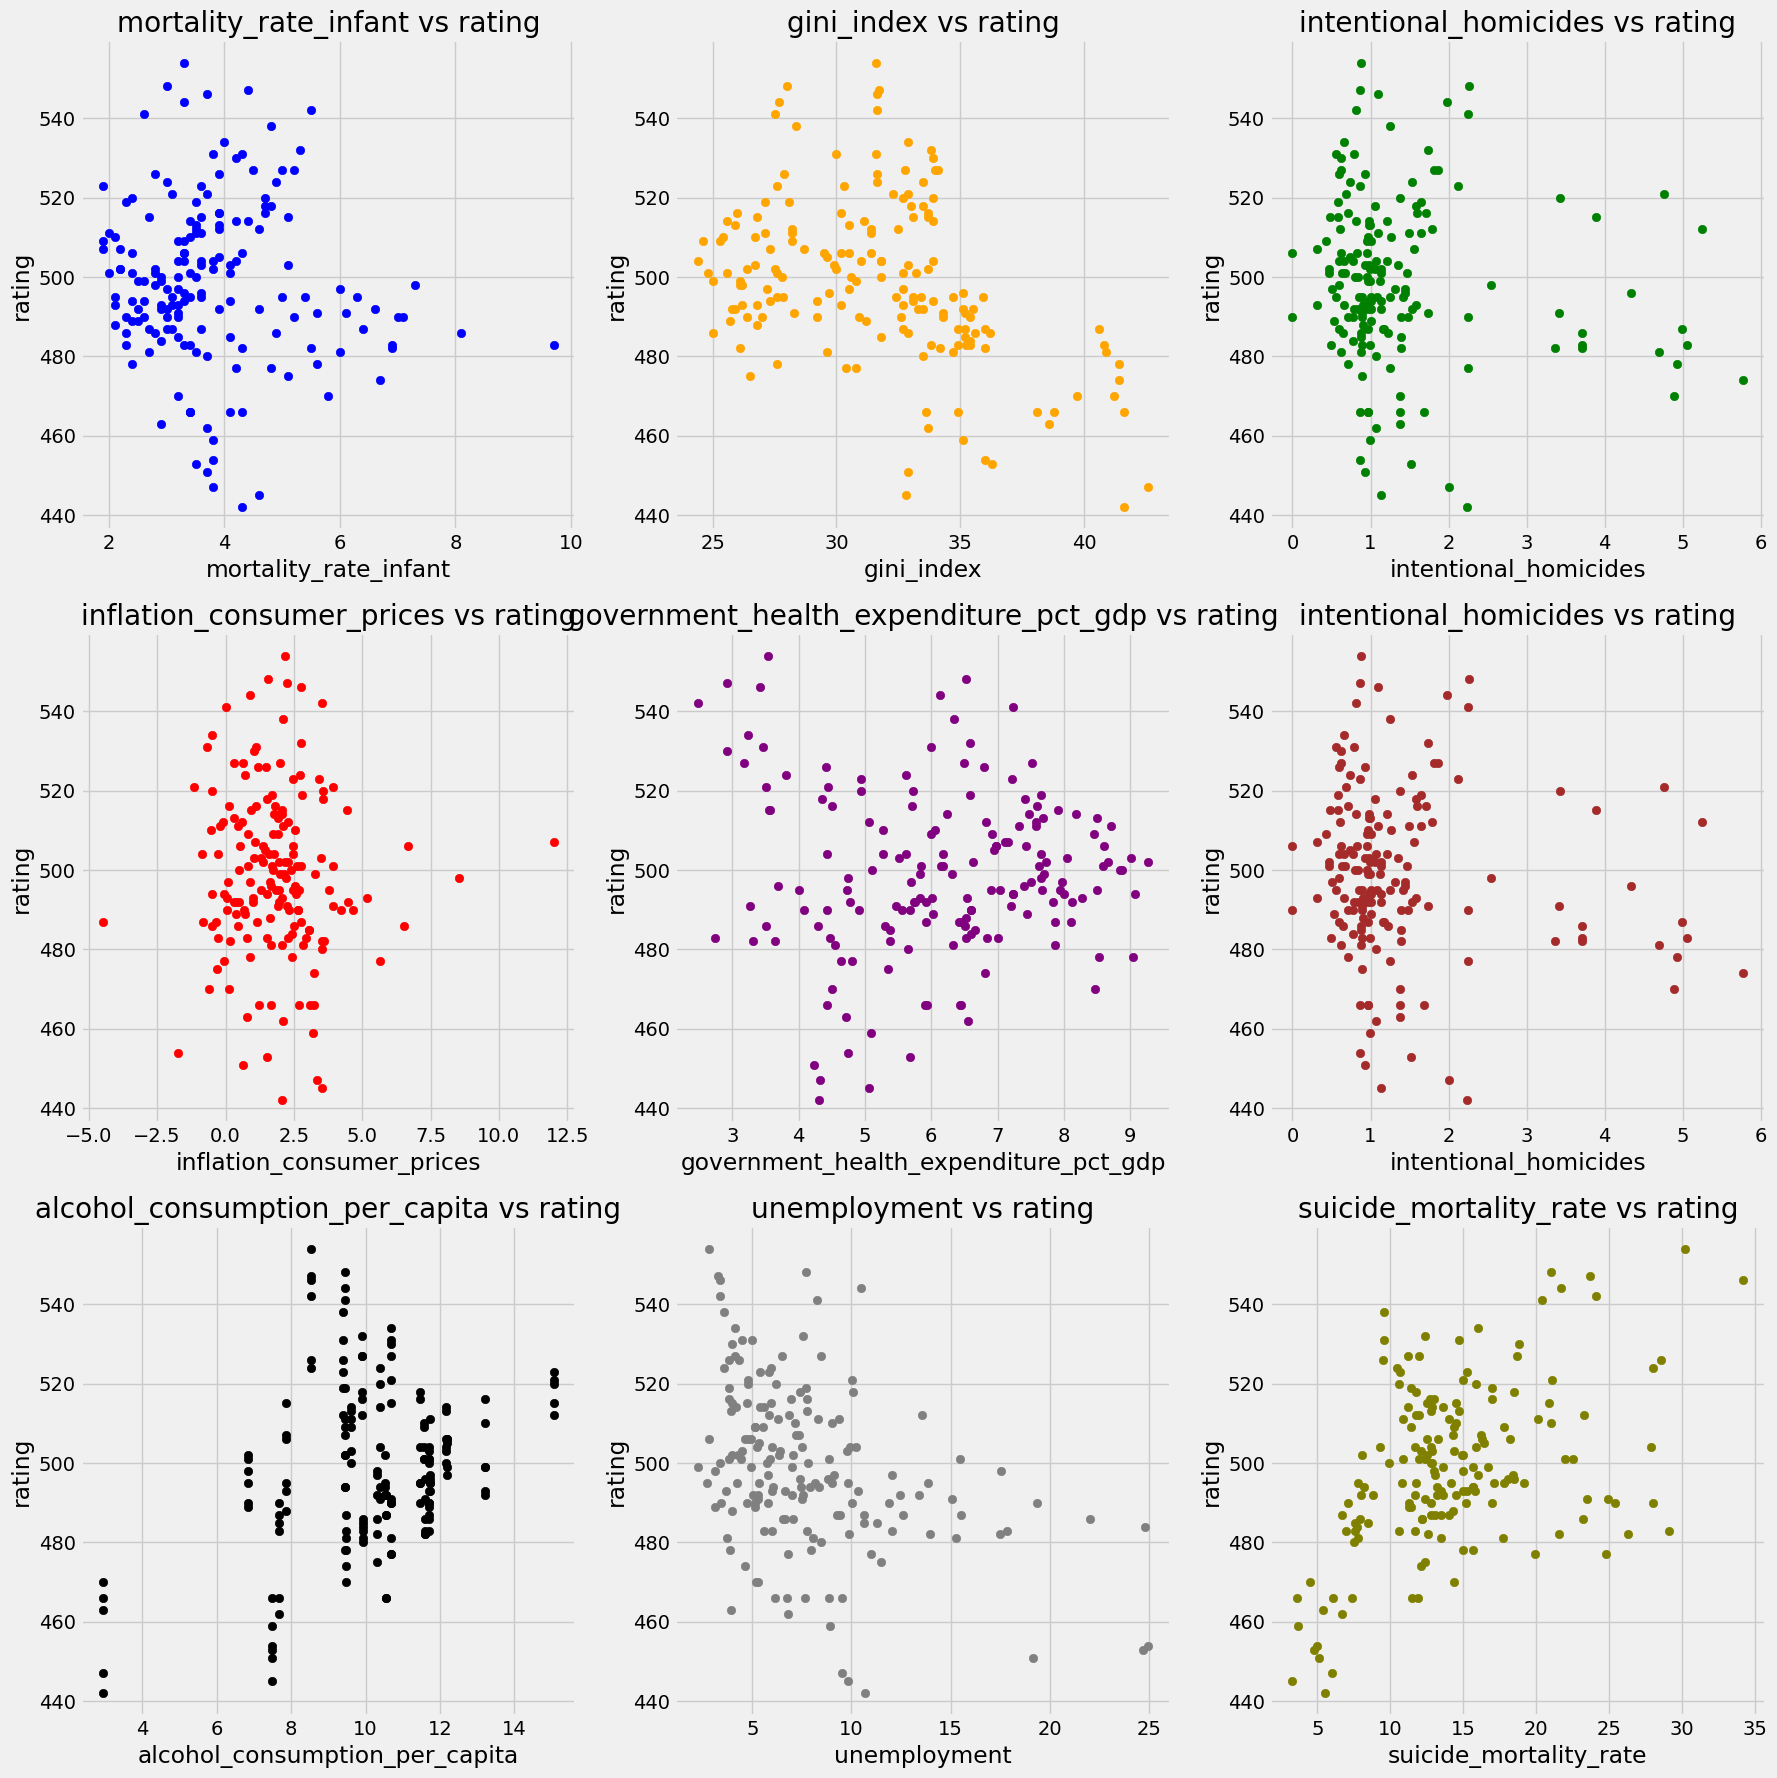

In [ ]:
# exploratory data analysis based on correlation matrix

# list of features that has quite high correlation score
features = ["mortality_rate_infant", "gini_index", "intentional_homicides",
            "inflation_consumer_prices",  "government_health_expenditure_pct_gdp", "intentional_homicides",
            "alcohol_consumption_per_capita", "unemployment", "suicide_mortality_rate"
           ]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'black', 'gray', 'olive']

# create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# flatten axes for easy iteration
axes = axes.flatten()

# plot scatter plots for each feature
for i, (feature, color) in enumerate(zip(features, colors)):
    ax = axes[i]
    ax.scatter(pisa_df_tot[feature], pisa_df_tot['rating'],color=color)
    ax.set_xlabel(feature)
    ax.set_ylabel('rating')
    ax.set_title(f'{feature} vs rating')

# adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# scaling and transforming numerical variables
scaler = StandardScaler()

num_X = pisa_df_tot.select_dtypes(exclude='object')
num_columns = num_X.drop(['rating','time'],axis=1).columns
# (time is a number, but it is indeed a categorical variable!)

# uses standard scaler to transform all numerical variables
pisa_df_tot[num_columns]= scaler.fit_transform(pisa_df_tot[num_columns])
# one-hot-encodes categorical variables of country and time
country_col = pisa_df_tot.country
pisa_df_tot = pd.get_dummies(pisa_df_tot,columns=['country','time'],drop_first=True,dtype=int)
pisa_df_tot["country"] = country_col
display(pisa_df_tot.head())

,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,...,country_SVK,country_SVN,country_SWE,country_USA,time_2006,time_2009,time_2012,time_2015,time_2018,country
index_code,,,,,,,,,,,,,,,,,,,,,
AUS-2003,-0.029140,0.831882,0.462126,-0.546819,0.507257,0.142289,-0.426994,0.872513,-1.001173,-0.660127,...,0,0,0,0,0,0,0,0,0,AUS
AUS-2006,-0.496382,0.679648,0.559458,-0.258194,0.968513,-0.005489,-0.695237,1.294253,-1.000452,-0.642575,...,0,0,0,0,1,0,0,0,0,AUS
AUS-2009,-0.180958,0.299063,0.559458,0.075682,-0.031812,-0.152009,-0.512982,1.248829,-0.999228,-0.537262,...,0,0,0,0,0,1,0,0,0,AUS
AUS-2012,-0.378414,-0.157639,0.559458,0.231708,-0.036486,-0.285880,-0.592426,1.200883,-0.998200,-0.449501,...,0,0,0,0,0,0,1,0,0,AUS
AUS-2015,0.034482,-0.385990,0.559458,0.440957,-0.179127,-0.358186,-0.398488,0.909389,-0.997132,-0.186219,...,0,0,0,0,0,0,0,1,0,AUS


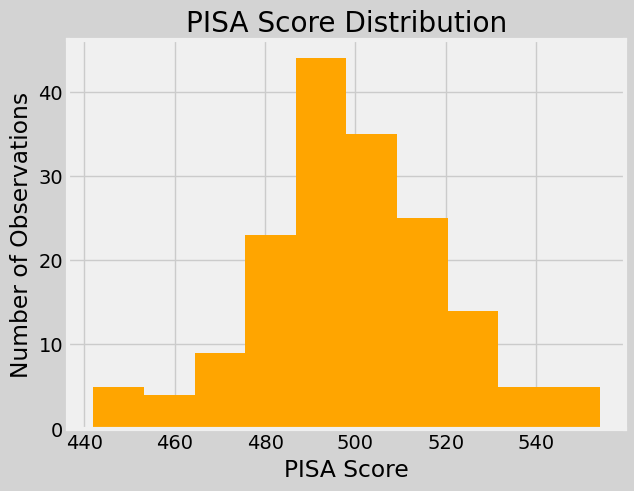

In [ ]:
# plots histogram of PISA score distribution after data cleaning
plt.figure().set_facecolor("lightgrey")
plt.hist(pisa_df_tot.rating, color = "orange")
plt.title("PISA Score Distribution")
plt.ylabel("Number of Observations")
plt.xlabel("PISA Score")
plt.show()

# LINEAR, RIDGE, and LASSO MODELS: SELECTING BEST MODEL
---

In [ ]:
# train and test dataset split
x_df = pisa_df_tot.loc[:,pisa_df_tot.columns != "rating"]
y_df = pisa_df_tot["rating"]

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2)

In [ ]:
# defining 7 different models
model1x = x_train[["gini_index","unemployment"]]
model2x = x_train[["mortality_rate_infant","intentional_homicides","suicide_mortality_rate"]]
model3x = x_train[["government_health_expenditure_pct_gdp","expenditure_on _education_pct_gdp"]]
model4x = x_train[["population_density","urban_population_pct_total"]]
model5x = x_train[["tax_revenue","taxes_on_income_profits_capital","gdp_per_capita_ppp"]]
model6x = x_train[["gini_index","mortality_rate_infant","intentional_homicides","suicide_mortality_rate", \
                   "alcohol_consumption_per_capita","government_health_expenditure_pct_gdp"]]
model7x = x_train[["alcohol_consumption_per_capita","intentional_homicides","urban_population_pct_total"]]

In [ ]:
# calcualtes best RIDGE and LASSO alphas for each model using cross-validation from training dataset
# RIDGE
ridgeCV = RidgeCV(alphas = np.arange(0.01,100,0.05)).fit(model1x,y_train)
alpha1r = ridgeCV.alpha_
print("Most appropriate Ridge alpha for model 1:", alpha1r)

ridgeCV = RidgeCV(alphas = np.arange(0.01,100,0.05)).fit(model2x,y_train)
alpha2r = ridgeCV.alpha_
print("Most appropriate Ridge alpha for model 2:", alpha2r)

ridgeCV = RidgeCV(alphas = np.arange(0.01,100,0.05)).fit(model3x,y_train)
alpha3r = ridgeCV.alpha_
print("Most appropriate Ridge alpha for model 3:", alpha3r)

ridgeCV = RidgeCV(alphas = np.arange(0.01,100,0.05)).fit(model4x,y_train)
alpha4r = ridgeCV.alpha_
print("Most appropriate Ridge alpha for model 4:", alpha4r)

ridgeCV = RidgeCV(alphas = np.arange(0.01,100,0.05)).fit(model5x,y_train)
alpha5r = ridgeCV.alpha_
print("Most appropriate Ridge alpha for model 5:", alpha5r)

ridgeCV = RidgeCV(alphas = np.arange(0.01,100,0.05)).fit(model6x,y_train)
alpha6r = ridgeCV.alpha_
print("Most appropriate Ridge alpha for model 6:", alpha6r)

ridgeCV = RidgeCV(alphas = np.arange(0.01,100,0.05)).fit(model7x,y_train)
alpha7r = ridgeCV.alpha_
print("Most appropriate Ridge alpha for model 7:", alpha7r, "\n")

# LASSO
lassoCV = LassoCV(cv = None, n_alphas = 100).fit(model1x,y_train)
alpha1l = lassoCV.alpha_
print("Most appropriate LASSO alpha for model 1:", alpha1l)

lassoCV = LassoCV(cv = None, n_alphas = 100).fit(model2x,y_train)
alpha2l = lassoCV.alpha_
print("Most appropriate LASSO alpha for model 2:", alpha2l)

lassoCV = LassoCV(cv = None, n_alphas = 100).fit(model3x,y_train)
alpha3l = lassoCV.alpha_
print("Most appropriate LASSO alpha for model 3:", alpha3l)

lassoCV = LassoCV(cv = None, n_alphas = 100).fit(model4x,y_train)
alpha4l = lassoCV.alpha_
print("Most appropriate LASSO alpha for model 4:", alpha4l)

lassoCV = LassoCV(cv = None, n_alphas = 100).fit(model5x,y_train)
alpha5l = lassoCV.alpha_
print("Most appropriate LASSO alpha for model 5:", alpha5l)

lassoCV = LassoCV(cv = None, n_alphas = 100).fit(model6x,y_train)
alpha6l = lassoCV.alpha_
print("Most appropriate LASSO alpha for model 6:", alpha6l)

lassoCV = LassoCV(cv = None, n_alphas = 100).fit(model7x,y_train)
alpha7l = lassoCV.alpha_
print("Most appropriate LASSO alpha for model 7:", alpha7l)

Most appropriate Ridge alpha for model 1: 7.01
Most appropriate Ridge alpha for model 2: 6.76
Most appropriate Ridge alpha for model 3: 65.81
Most appropriate Ridge alpha for model 4: 76.21000000000001
Most appropriate Ridge alpha for model 5: 62.86
Most appropriate Ridge alpha for model 6: 21.460000000000004
Most appropriate Ridge alpha for model 7: 1.36 

Most appropriate LASSO alpha for model 1: 0.009688719668735267
Most appropriate LASSO alpha for model 2: 0.49820294669828463
Most appropriate LASSO alpha for model 3: 0.1195576940589756
Most appropriate LASSO alpha for model 4: 0.8309474024852266
Most appropriate LASSO alpha for model 5: 1.8648432123347791
Most appropriate LASSO alpha for model 6: 0.6142078784174095
Most appropriate LASSO alpha for model 7: 0.11582748247194662


In [ ]:
# implementing K-fold to test for best model (manual)

# initializes k group IDs, creating modified training dataframes for cross-validation
kgroup_ids = np.arange(1,6)
kgroups_array = np.repeat(kgroup_ids,27)
np.random.shuffle(kgroups_array)
x_train["k_group"] = kgroups_array
y_train_cv= pd.DataFrame({'rating':y_train,'k_group':kgroups_array})

y_train1 = y_train_cv.loc[y_train_cv["k_group"] != 1]['rating']

# implementing Kfold to select the best model
ridge_1_mses = []
ridge_2_mses = []
ridge_3_mses = []
ridge_4_mses = []
ridge_5_mses = []
ridge_6_mses = []
ridge_7_mses = []

linear_1_mses = []
linear_2_mses = []
linear_3_mses = []
linear_4_mses = []
linear_5_mses = []
linear_6_mses = []
linear_7_mses = []

lasso_1_mses = []
lasso_2_mses = []
lasso_3_mses = []
lasso_4_mses = []
lasso_5_mses = []
lasso_6_mses = []
lasso_7_mses = []

for k in kgroup_ids:
  print('working on fold', k, "...")
  x_train1 = x_train.loc[x_train["k_group"] != k]
  y_train1 = y_train_cv.loc[y_train_cv["k_group"] != k]['rating']
  x_test1 = x_train.loc[x_train["k_group"] == k]
  y_test1 = y_train_cv.loc[y_train_cv["k_group"] == k]['rating']


  model1x = x_train1[["gini_index","unemployment"]]
  model2x = x_train1[["mortality_rate_infant","intentional_homicides","suicide_mortality_rate"]]
  model3x = x_train1[["government_health_expenditure_pct_gdp","expenditure_on _education_pct_gdp"]]
  model4x = x_train1[["population_density","urban_population_pct_total"]]
  model5x = x_train1[["tax_revenue","taxes_on_income_profits_capital","gdp_per_capita_ppp"]]
  model6x = x_train1[["gini_index","mortality_rate_infant","intentional_homicides","suicide_mortality_rate", \
                     "alcohol_consumption_per_capita","government_health_expenditure_pct_gdp"]]
  model7x = x_train1[["alcohol_consumption_per_capita","intentional_homicides","urban_population_pct_total"]]


  model1tst = x_test1[["gini_index","unemployment"]]
  model2tst = x_test1[["mortality_rate_infant","intentional_homicides","suicide_mortality_rate"]]
  model3tst = x_test1[["government_health_expenditure_pct_gdp","expenditure_on _education_pct_gdp"]]
  model4tst = x_test1[["population_density","urban_population_pct_total"]]
  model5tst = x_test1[["tax_revenue","taxes_on_income_profits_capital","gdp_per_capita_ppp"]]
  model6tst = x_test1[["gini_index","mortality_rate_infant","intentional_homicides","suicide_mortality_rate", \
                     "alcohol_consumption_per_capita","government_health_expenditure_pct_gdp"]]
  model7tst = x_test1[["alcohol_consumption_per_capita","intentional_homicides","urban_population_pct_total"]]

  ridgereg = Ridge(alpha = alpha1r).fit(model1x,y_train1)
  predicted_y1 = ridgereg.predict(model1tst)
  print("-----------")
  # print("MSE for Model 1 Ridge regression:",mean_squared_error(y_test1,predicted_y1))
  ridge_1_mses.append(mean_squared_error(y_test1,predicted_y1))

  ridgereg = Ridge(alpha = alpha2r).fit(model2x,y_train1)
  predicted_y2 = ridgereg.predict(model2tst)
  # print("MSE for Model 2 Ridge regression:",mean_squared_error(y_test1,predicted_y2))
  ridge_2_mses.append(mean_squared_error(y_test1,predicted_y2))

  ridgereg = Ridge(alpha = alpha3r).fit(model3x,y_train1)
  predicted_y3 = ridgereg.predict(model3tst)
  # print("MSE for Model 3 Ridge regression:",mean_squared_error(y_test1,predicted_y3))
  ridge_3_mses.append(mean_squared_error(y_test1,predicted_y3))

  ridgereg = Ridge(alpha = alpha4r).fit(model4x,y_train1)
  predicted_y4 = ridgereg.predict(model4tst)
  # print("MSE for Model 4 Ridge regression:",mean_squared_error(y_test1,predicted_y4))
  ridge_4_mses.append(mean_squared_error(y_test1,predicted_y4))

  ridgereg = Ridge(alpha = alpha5r).fit(model5x,y_train1)
  predicted_y5 = ridgereg.predict(model5tst)
  # print("MSE for Model 5 Ridge regression:",mean_squared_error(y_test1,predicted_y5))
  ridge_5_mses.append(mean_squared_error(y_test1,predicted_y5))

  ridgereg = Ridge(alpha = alpha6r).fit(model6x,y_train1)
  predicted_y6 = ridgereg.predict(model6tst)
  # print("MSE for Model 6 Ridge regression:",mean_squared_error(y_test1,predicted_y6))
  ridge_6_mses.append(mean_squared_error(y_test1,predicted_y6))

  ridgereg = Ridge(alpha = alpha7r).fit(model7x,y_train1)
  predicted_y7 = ridgereg.predict(model7tst)
  # print("MSE for Model 7 Ridge regression:",mean_squared_error(y_test1,predicted_y7))
  ridge_7_mses.append(mean_squared_error(y_test1,predicted_y7))

  linearReg = LinearRegression().fit(model1x,y_train1)
  predicted_y1 = linearReg.predict(model1tst)
  # print("MSE for Model 1 Linear regression:",mean_squared_error(y_test1,predicted_y1))
  linear_1_mses.append(mean_squared_error(y_test1,predicted_y1))

  linearReg = LinearRegression().fit(model2x,y_train1)
  predicted_y2 = linearReg.predict(model2tst)
  # print("MSE for Model 2 Linear regression:",mean_squared_error(y_test1,predicted_y2))
  linear_2_mses.append(mean_squared_error(y_test1,predicted_y2))

  linearReg = LinearRegression().fit(model3x,y_train1)
  predicted_y3 = linearReg.predict(model3tst)
  # print("MSE for Model 3 Linear regression:",mean_squared_error(y_test1,predicted_y3))
  linear_3_mses.append(mean_squared_error(y_test1,predicted_y3))

  linearReg = LinearRegression().fit(model4x,y_train1)
  predicted_y4 = linearReg.predict(model4tst)
  # print("MSE for Model 4 Linear regression:",mean_squared_error(y_test1,predicted_y4))
  linear_4_mses.append(mean_squared_error(y_test1,predicted_y4))

  linearReg = LinearRegression().fit(model5x,y_train1)
  predicted_y5 = linearReg.predict(model5tst)
  # print("MSE for Model 5 Linear regression:",mean_squared_error(y_test1,predicted_y5))
  linear_5_mses.append(mean_squared_error(y_test1,predicted_y5))

  linearReg = LinearRegression().fit(model6x,y_train1)
  predicted_y6 = linearReg.predict(model6tst)
  # print("MSE for Model 6 Linear regression:",mean_squared_error(y_test1,predicted_y6))
  linear_6_mses.append(mean_squared_error(y_test1,predicted_y6))

  linearReg = LinearRegression().fit(model7x,y_train1)
  predicted_y7 = linearReg.predict(model7tst)
  # print("MSE for Model 7 Linear regression:",mean_squared_error(y_test1,predicted_y7))
  linear_7_mses.append(mean_squared_error(y_test1,predicted_y7))

  lassoreg = Lasso(alpha = alpha1l).fit(model1x,y_train1)
  predicted_y1 = lassoreg.predict(model1tst)
  # print("MSE for Model 1 LASSO regression:",mean_squared_error(y_test1,predicted_y1))
  lasso_1_mses.append(mean_squared_error(y_test1,predicted_y1))

  lassoreg = Lasso(alpha = alpha2l).fit(model2x,y_train1)
  predicted_y2 = lassoreg.predict(model2tst)
  # print("MSE for Model 2 LASSO regression:",mean_squared_error(y_test1,predicted_y2))
  lasso_2_mses.append(mean_squared_error(y_test1,predicted_y2))

  lassoreg = Lasso(alpha = alpha3l).fit(model3x,y_train1)
  predicted_y3 = lassoreg.predict(model3tst)
  # print("MSE for Model 3 LASSO regression:",mean_squared_error(y_test1,predicted_y3))
  lasso_3_mses.append(mean_squared_error(y_test1,predicted_y3))

  lassoreg = Lasso(alpha = alpha4l).fit(model4x,y_train1)
  predicted_y4 = lassoreg.predict(model4tst)
  # print("MSE for Model 4 LASSO regression:",mean_squared_error(y_test1,predicted_y4))
  lasso_4_mses.append(mean_squared_error(y_test1,predicted_y4))

  lassoreg = Lasso(alpha = alpha5l).fit(model5x,y_train1)
  predicted_y5 = lassoreg.predict(model5tst)
  # print("MSE for Model 5 LASSO regression:",mean_squared_error(y_test1,predicted_y5))
  lasso_5_mses.append(mean_squared_error(y_test1,predicted_y5))

  lassoreg = Lasso(alpha = alpha6l).fit(model6x,y_train1)
  predicted_y6 = lassoreg.predict(model6tst)
  # print("MSE for Model 6 LASSO regression:",mean_squared_error(y_test1,predicted_y6))
  lasso_6_mses.append(mean_squared_error(y_test1,predicted_y6))

  lassoreg = Lasso(alpha = alpha7l).fit(model7x,y_train1)
  predicted_y7 = lassoreg.predict(model7tst)
  # print("MSE for Model 7 LASSO regression:",mean_squared_error(y_test1,predicted_y7))
  lasso_7_mses.append(mean_squared_error(y_test1,predicted_y7))
  print(' ')

print("Ridge Model 1 Mean MSE:",np.mean(ridge_1_mses))
print("Ridge Model 2 Mean MSE:",np.mean(ridge_2_mses))
print("Ridge Model 3 Mean MSE:",np.mean(ridge_3_mses))
print("Ridge Model 4 Mean MSE:",np.mean(ridge_4_mses))
print("Ridge Model 5 Mean MSE:",np.mean(ridge_5_mses))
print("Ridge Model 6 Mean MSE:",np.mean(ridge_6_mses))
print("Ridge Model 7 Mean MSE:",np.mean(ridge_7_mses))
print(" ")
print("Linear Model 1 Mean MSE:",np.mean(linear_1_mses))
print("Linear Model 2 Mean MSE:",np.mean(linear_2_mses))
print("Linear Model 3 Mean MSE:",np.mean(linear_3_mses))
print("Linear Model 4 Mean MSE:",np.mean(linear_4_mses))
print("Linear Model 5 Mean MSE:",np.mean(linear_5_mses))
print("Linear Model 6 Mean MSE:",np.mean(linear_6_mses))
print("Linear Model 7 Mean MSE:",np.mean(linear_7_mses))
print(" ")
print("LASSO Model 1 Mean MSE:",np.mean(lasso_1_mses))
print("LASSO Model 2 Mean MSE:",np.mean(lasso_2_mses))
print("LASSO Model 3 Mean MSE:",np.mean(lasso_3_mses))
print("LASSO Model 4 Mean MSE:",np.mean(lasso_4_mses))
print("LASSO Model 5 Mean MSE:",np.mean(lasso_5_mses))
print("LASSO Model 6 Mean MSE:",np.mean(lasso_6_mses))
print("LASSO Model 7 Mean MSE:",np.mean(lasso_7_mses))

working on fold 1 ...
-----------
 
working on fold 2 ...
-----------
 
working on fold 3 ...
-----------
 
working on fold 4 ...
-----------
 
working on fold 5 ...
-----------
 
Ridge Model 1 Mean MSE: 363.7181114761211
Ridge Model 2 Mean MSE: 340.127916178825
Ridge Model 3 Mean MSE: 481.6210147382588
Ridge Model 4 Mean MSE: 479.99420935256694
Ridge Model 5 Mean MSE: 464.2527818044
Ridge Model 6 Mean MSE: 312.111458519555
Ridge Model 7 Mean MSE: 359.3239565787832
 
Linear Model 1 Mean MSE: 365.94373077459625
Linear Model 2 Mean MSE: 341.93861017178915
Linear Model 3 Mean MSE: 483.76836839344367
Linear Model 4 Mean MSE: 486.364547771024
Linear Model 5 Mean MSE: 462.6127208819713
Linear Model 6 Mean MSE: 312.89516216022065
Linear Model 7 Mean MSE: 359.18027384626623
 
LASSO Model 1 Mean MSE: 365.9243065813704
LASSO Model 2 Mean MSE: 342.83312831290635
LASSO Model 3 Mean MSE: 483.7333773999268
LASSO Model 4 Mean MSE: 483.7819812744141
LASSO Model 5 Mean MSE: 465.9111772009381
LASSO Mode

In [ ]:
# recursively implementing K-fold to test for best model a number of times
# will contextualize how the ORIGINAL test-train split affects best model

# a list of the 7 chosen possible models, in order model 1-7
models = [["gini_index","unemployment"],
          ["mortality_rate_infant","intentional_homicides","suicide_mortality_rate"],
          ["government_health_expenditure_pct_gdp","expenditure_on _education_pct_gdp"],
          ["population_density","urban_population_pct_total"],
          ["tax_revenue","taxes_on_income_profits_capital","gdp_per_capita_ppp"],
          ["gini_index","mortality_rate_infant","intentional_homicides","suicide_mortality_rate", \
                     "alcohol_consumption_per_capita","government_health_expenditure_pct_gdp"],
          ["alcohol_consumption_per_capita","intentional_homicides","urban_population_pct_total"]]

# for each K-fold CV, records best model (out of 21), and their MSEs and R2s
best_models = np.array([])
best_mses = np.array([])
best_r2s = np.array([])

# THIS PART WILL TAKE LONG TO RUN: CAN LIMIT K-FOLDS TO ONE: range(100) -> range(1)
for split in notebook.tqdm(range(100)):
  # creates a shuffled K-fold indicies of given folds (default=5)
  k = 5
  kfold = KFold(n_splits=k,shuffle=True)

  model_mses = np.zeros((3,7))
  model_r2s = np.zeros((3,7))

  # does a randomized initial test-train split before running K-Fold CV
  x_traink, x_testk, y_traink, y_testk = train_test_split(x_df, y_df, test_size = 0.2)

  # iterates over each of the models
  for m,model in enumerate(models):
    # calculates best fitting RIDGE and LASSO alphas using new initial training dataframe and model
    ridgeCV = RidgeCV(alphas = np.arange(0.01,100,0.05)).fit(x_traink[model],y_traink)
    ralpha = ridgeCV.alpha_
    lassoCV = LassoCV(cv=None,n_alphas=500).fit(x_traink[model],y_traink)
    lalpha = lassoCV.alpha_

    # for each K-fold, record that fold's MSE and R2 values
    mses = np.zeros((3,k))
    r2s = np.zeros((3,k))
    # fold number (0 to k-1)
    ki = 0

    # performs K-fold CV
    for train_index,test_index in kfold.split(x_traink):
      # test and train split for specific fold, from initial training dataframe and model
      X_tr, X_te, y_tr, y_te = x_traink.iloc[train_index], x_traink.iloc[test_index], y_traink.iloc[train_index], y_traink.iloc[test_index]

      # performs linear regression on training fold, predicts y using test fold
      linearReg = LinearRegression().fit(X_tr[model],y_tr)
      predicted_y = linearReg.predict(X_te[model])
      mses[0][ki] = mean_squared_error(y_te,predicted_y)
      r2s[0][ki] = r2_score(y_te,predicted_y)

      # performs RIDGE regression on training fold, predicts y using test fold
      ridgeReg = Ridge(alpha = ralpha).fit(X_tr[model],y_tr)
      predicted_y = ridgeReg.predict(X_te[model])
      mses[1][ki] = mean_squared_error(y_te,predicted_y)
      r2s[1][ki] = r2_score(y_te,predicted_y)

      # performs LASSO regression on training fold, predicts y using test fold
      lassoReg = Lasso(alpha = lalpha).fit(X_tr[model],y_tr)
      predicted_y = lassoReg.predict(X_te[model])
      mses[2][ki] = mean_squared_error(y_te,predicted_y)
      r2s[2][ki] = r2_score(y_te,predicted_y)

      # increases fold number
      ki += 1

    # across all folds, calculates the mean MSE
    model_mses[0][m] = np.mean(mses[0])
    model_mses[1][m] = np.mean(mses[1])
    model_mses[2][m] = np.mean(mses[2])

    # across all folds, calculates the mean R2 score
    model_r2s[0][m] = np.mean(r2s[0])
    model_r2s[1][m] = np.mean(r2s[1])
    model_r2s[2][m] = np.mean(r2s[2])

  # out of a given K-Fold CV, appends best model, and its MSE and R2
  best_models = np.append(best_models,np.argmin(model_mses))
  best_mses = np.append(best_mses,np.min(model_mses))
  best_r2s = np.append(best_r2s,model_r2s[np.argmin(model_mses)//7][np.argmin(model_mses)%7])

#Printing the statistics for the first 10 runs of the loop (to find the best model)
print("Best Models (#):",best_models[:9])
print("Best Model MSE:",best_mses[:9])
print("Best Model R^2:",best_r2s[:9])

  0%|          | 0/100 [00:00<?, ?it/s]

Best Models (#): [12. 13. 12.  0.  7. 19.  0. 12. 12.]
Best Model MSE: [316.33573026 315.97420626 313.46558336 340.64742678 335.42158805
 313.5229693  288.13779761 302.59490713 308.19019473]
Best Model R^2: [0.19927372 0.17397247 0.22717893 0.21235763 0.21328092 0.24138915
 0.22510881 0.24042682 0.24014788]


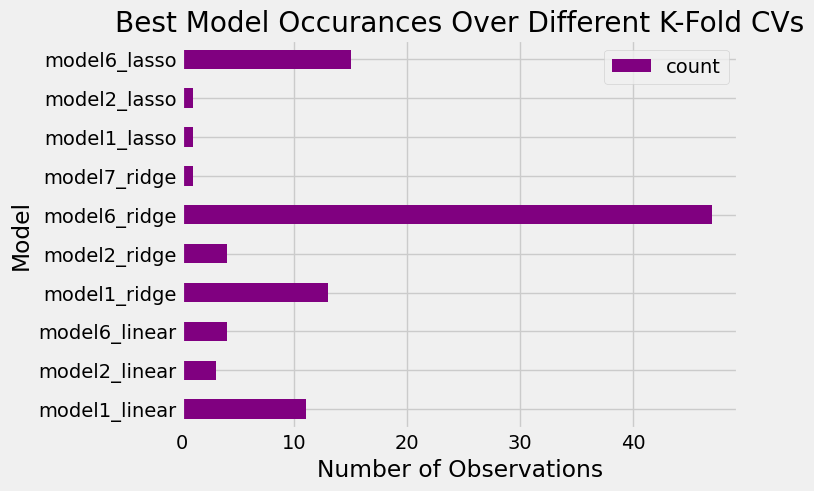

In [ ]:
# results from recursive K-Fold tries

# matches model number to an informative name
models_s = []
for mo in range(21):
  if mo//7==0:
    models_s.append("model"+str(mo%7+1)+"_linear")
  elif mo//7==1:
    models_s.append("model"+str(mo%7+1)+"_ridge")
  else:
    models_s.append("model"+str(mo%7+1)+"_lasso")

# gets best models, and their occurernces over the number of K-Folds
x,height = np.unique(best_models,return_counts=True)
best_models_df = pd.DataFrame({"model":x,"count":height})
best_models_df["model"] = best_models_df["model"].replace(np.arange(21),models_s)
# plots histogram of best model over multiple K-Folds
best_models_df.plot.barh(x="model",y="count",color="purple")
plt.title("Best Model Occurrences Over Different K-Fold CVs")
plt.ylabel("Model")
plt.xlabel("Number of Observations")
plt.show()

In [ ]:
# choosing best model based on histogram; running a normal CV using original test-train split

# best model: model 6, RIDGE
model6_train = x_train[["gini_index","mortality_rate_infant","intentional_homicides","suicide_mortality_rate", \
                        "alcohol_consumption_per_capita","government_health_expenditure_pct_gdp"]]
model6_test = x_test[["gini_index","mortality_rate_infant","intentional_homicides","suicide_mortality_rate", \
                        "alcohol_consumption_per_capita","government_health_expenditure_pct_gdp"]]

# recalculates and saves RIDGE alpha for clarity
best_ridgeCV = RidgeCV(alphas = np.arange(0.01,100,0.05)).fit(model6_train,y_train)
best_alpha = best_ridgeCV.alpha_

# performs regression, predicts using test dataframe
best_ridgereg = Ridge(alpha=best_alpha).fit(model6_train,y_train)
best_predicted_y = best_ridgereg.predict(model6_test)

# calculates MSE and r2
best_mse = mean_squared_error(y_test,best_predicted_y)
best_r2 = r2_score(y_test,best_predicted_y)

# BEST MODEL ANALYSIS
---

MSE for Model 6 Ridge regression: 294.86822815410557


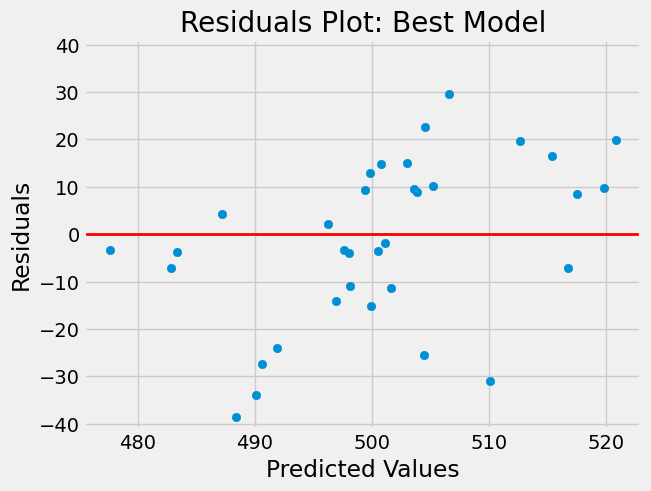

Most appropriate Ridge alpha for model 6 (with country control): 0.11
MSE for Model 6 + Country Variable Ridge regression: 94.60608174263879


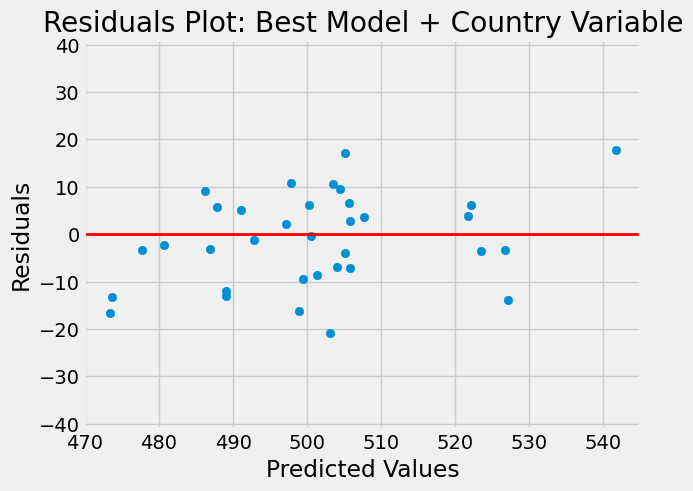

In [ ]:
# looking at the best model's residuals & comparing when we also control for country
print("MSE for Model 6 Ridge regression:",best_mse)

# plotting the residuals for the best model
plt.scatter(best_predicted_y,best_predicted_y - y_test)
plt.ylim(-41,41)
plt.axhline(0,color='red',linewidth = 2)
plt.title('Residuals Plot: Best Model')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# getting the MSE for the best model + controlling for country
country_control = x_train[["gini_index","mortality_rate_infant","intentional_homicides","suicide_mortality_rate", \
                           "alcohol_consumption_per_capita","government_health_expenditure_pct_gdp",'country_AUT', 'country_CAN', \
                           'country_CHE', 'country_CZE','country_DEU', 'country_DNK', 'country_ESP', 'country_EST','country_FIN', \
                           'country_FRA', 'country_GBR', 'country_GRC','country_HUN', 'country_IRL', 'country_ISL', 'country_ISR','country_ITA', \
                           'country_KOR', 'country_LUX', 'country_LVA','country_NLD', 'country_NOR', 'country_POL', 'country_PRT','country_SVK', \
                           'country_SVN', 'country_SWE', 'country_USA']]

ridgeCV = RidgeCV(alphas=np.arange(0.01,100,0.05)).fit(country_control,y_train)
print("Most appropriate Ridge alpha for model 6 (with country control):", ridgeCV.alpha_)

country_control_tst = x_test[["gini_index","mortality_rate_infant","intentional_homicides","suicide_mortality_rate", \
                   "alcohol_consumption_per_capita","government_health_expenditure_pct_gdp",'country_AUT', 'country_CAN', \
                           'country_CHE', 'country_CZE','country_DEU', 'country_DNK', 'country_ESP', 'country_EST','country_FIN', \
                           'country_FRA', 'country_GBR', 'country_GRC','country_HUN', 'country_IRL', 'country_ISL', 'country_ISR','country_ITA', \
                           'country_KOR', 'country_LUX', 'country_LVA','country_NLD', 'country_NOR', 'country_POL', 'country_PRT','country_SVK', \
                           'country_SVN', 'country_SWE', 'country_USA']]

ridgereg = Ridge(alpha=ridgeCV.alpha_).fit(country_control,y_train)
predicted_y_cc = ridgereg.predict(country_control_tst)
print("MSE for Model 6 + Country Variable Ridge regression:",mean_squared_error(y_test,predicted_y_cc))

plt.scatter(predicted_y_cc,predicted_y_cc-y_test)
plt.axhline(0,color='red',linewidth = 2)
plt.ylim(-41,41)
plt.title('Residuals Plot: Best Model + Country Variable')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

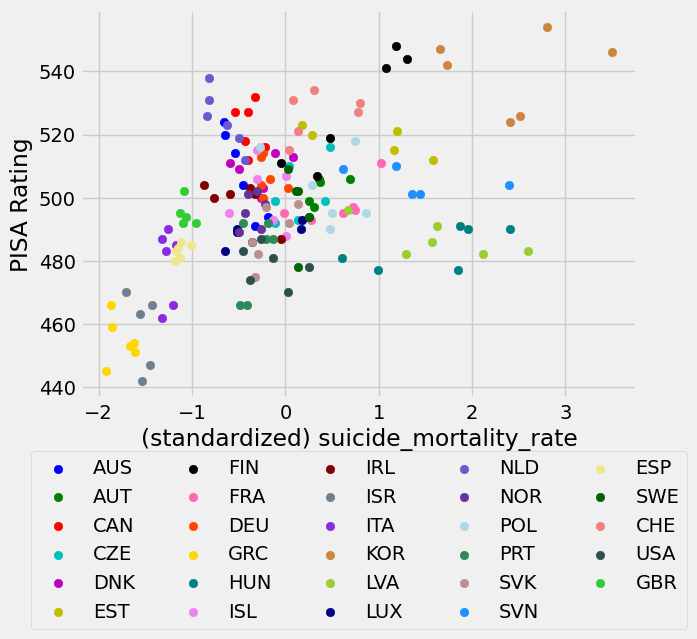

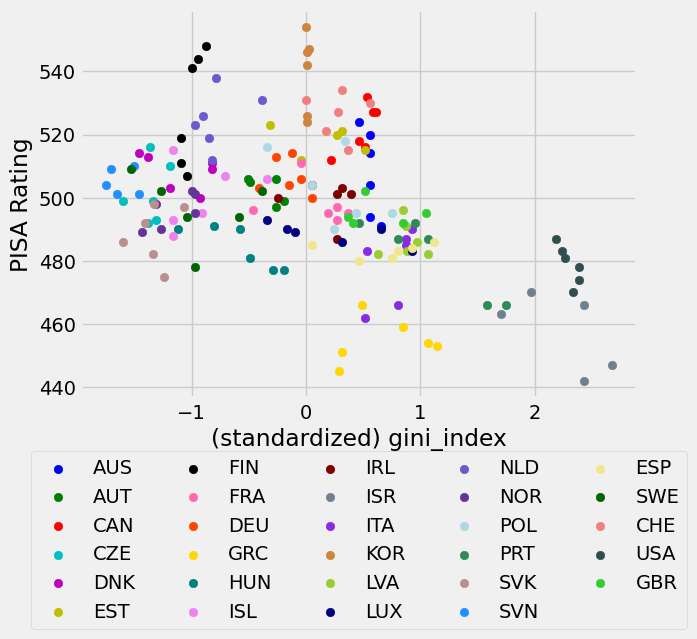

In [ ]:
# analyze how countries cluster over influential variables and the PISA score

colors = ["b","g","r","c","m","y","k","hotpink","orangered","gold","teal","violet","maroon","slategrey","blueviolet","peru","yellowgreen" \
          ,"navy","slateblue","rebeccapurple","lightblue","seagreen","rosybrown","dodgerblue","khaki","darkgreen","lightcoral","darkslategrey","limegreen"]

for i,country in enumerate(pisa_df_tot.country.unique()):
  plt.scatter(pisa_df_tot.loc[pisa_df_tot["country"] == country].suicide_mortality_rate,pisa_df_tot.loc[pisa_df_tot["country"] == country].rating, \
              label = country,color = colors[i])
  plt.legend(ncols=5,loc='upper center',bbox_to_anchor=(0.5, -0.11))
  plt.xlabel("(standardized) suicide_mortality_rate")
  plt.ylabel("PISA Rating")
plt.show()

print("\n")
for i,country in enumerate(pisa_df_tot.country.unique()):
  plt.scatter(pisa_df_tot.loc[pisa_df_tot["country"] == country].gini_index,pisa_df_tot.loc[pisa_df_tot["country"] == country].rating, \
              label = country,color = colors[i])
  plt.legend(ncols=5,loc='upper center',bbox_to_anchor=(0.5, -0.11))
  plt.xlabel("(standardized) gini_index")
  plt.ylabel("PISA Rating")
plt.show()

# CLUSTERING ANALYSIS
---

In [ ]:
# define dataframe for clustering, with best model including the PISA score
bestmodel_df = pisa_df_tot[["gini_index","mortality_rate_infant","intentional_homicides", \
                         "suicide_mortality_rate","alcohol_consumption_per_capita","government_health_expenditure_pct_gdp","rating"]]

# standardize PISA score
scaler = StandardScaler()
bestmodel_df[["rating"]] = scaler.fit_transform(bestmodel_df[["rating"]])

# display the dataframe
display(bestmodel_df.head())

<ipython-input-22-494ca2238d20>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bestmodel_df[["rating"]] = scaler.fit_transform(bestmodel_df[["rating"]])


,gini_index,mortality_rate_infant,intentional_homicides,suicide_mortality_rate,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,rating
index_code,,,,,,,
AUS-2003,0.462126,0.831882,0.142289,-0.660127,0.121143,-0.330309,1.206663
AUS-2006,0.559458,0.679648,-0.005489,-0.642575,0.121143,-0.269865,1.015228
AUS-2009,0.559458,0.299063,-0.152009,-0.537262,0.121143,0.059373,0.728076
AUS-2012,0.559458,-0.157639,-0.285880,-0.449501,0.121143,0.018771,0.249488
AUS-2015,0.559458,-0.385990,-0.358186,-0.186219,0.121143,0.681248,-0.229099


In [ ]:
# required definitions to perform K-Means Clustering

def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def initialize_centroids(df,K):
    random_ids = np.random.permutation(df.shape[0])
    centroids = df.iloc[random_ids[:K]]
    return centroids

def compute_distance(df, centroids):
    K=centroids.shape[0]
    distances_ar = np.zeros((df.shape[0], K))
    for k in range(K):
        point=centroids.iloc[k]
        def distance_from_point(row):
            return distance(point, np.array(row))
        distances_ar[:,k] = df.apply(distance_from_point,axis=1).values
    return distances_ar

def compute_sse(df, labels, centroids,K):
    distances_ar = np.zeros(df.shape[0])
    for k in range(K):
        point=centroids.iloc[k]
        def distance_from_point(row):
            return distance(point, np.array(row))
        distances_ar[labels == k] = df[labels == k].apply(distance_from_point,axis=1).values
    return np.sum(distances_ar)

def compute_centroids(df, labels, K):
    centroids = np.zeros((K, df.shape[1]))
    for k in range(K):
        centroids[k, :] = df[labels == k].mean()
    return centroids

def Kmeans(df,K):
    max_iter=20

    centroids=initialize_centroids(df,K)

    for i in range(max_iter):
            old_centroids = centroids
            dist_matrix = compute_distance(df, old_centroids)
            clust=np.argmin(dist_matrix,axis = 1)
            centroids = pd.DataFrame(compute_centroids(df,clust,K))

    return centroids,clust

def Kmeans_sse(df,K):
    '''performs Kmeans returns centroids and prints sse of each new centroids'''
    #define the maximum number of iterations
    max_iter=20

    #initialize centroids
    centroids=initialize_centroids(df,K)

    for i in range(max_iter):
            old_centroids = centroids
            dist_matrix = compute_distance(df, old_centroids)
            clust=np.argmin(dist_matrix, axis=1)
            centroids = pd.DataFrame(compute_centroids(df,clust,K))

    # return the centroids
    return compute_sse(df,clust,old_centroids,K)

In [ ]:
# create k and SSE arrays to find best number of clusters

k = np.array([])
sse = np.array([])
for i in np.arange(1,10):
    k = np.append(k,i)
    sse = np.append(sse,Kmeans_sse(bestmodel_df,i))

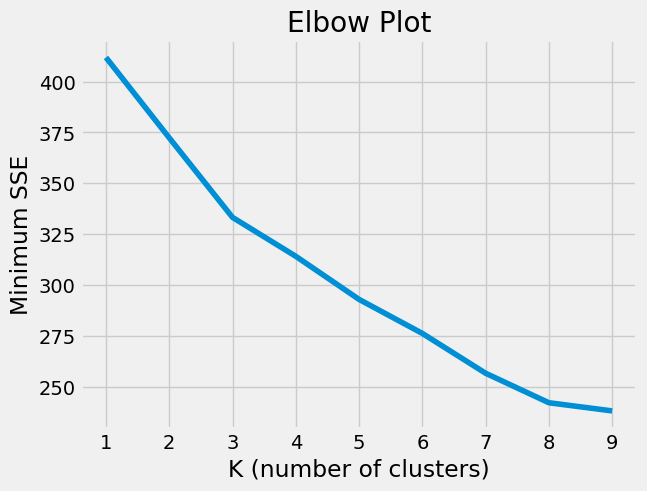

In [ ]:
# elbow plot is used to select number of clusters to use

plt.plot(k,sse)
plt.title("Elbow Plot")
plt.xlabel("K (number of clusters)")
plt.ylabel("Minimum SSE")
plt.show()

In [ ]:
# return centroids and clusters used chosen K=3
centroids,clust = Kmeans(bestmodel_df,3)

# show the clusters created by K-Means Clustering!
pd.set_option('display.max_rows', None)

country_names = bestmodel_df.index
cluster_countries = pd.DataFrame({"country":country_names,"cluster_label":clust})
cluster_countries

cluster0_countries = cluster_countries[cluster_countries["cluster_label"] == 0]
display(cluster0_countries)

cluster1_countries = cluster_countries[cluster_countries["cluster_label"] == 1]
display(cluster1_countries)

cluster2_countries = cluster_countries[cluster_countries["cluster_label"] == 2]
display(cluster2_countries)

,country,cluster_label
4,AUS-2015,0
5,AUS-2018,0
52,GRC-2003,0
53,GRC-2006,0
54,GRC-2009,0
55,GRC-2012,0
56,GRC-2015,0
57,GRC-2018,0
65,ISL-2006,0
67,ISL-2012,0


,country,cluster_label
0,AUS-2003,1
1,AUS-2006,1
2,AUS-2009,1
3,AUS-2012,1
6,AUT-2003,1
7,AUT-2006,1
8,AUT-2012,1
9,AUT-2015,1
10,AUT-2018,1
11,CAN-2003,1


,country,cluster_label
29,EST-2006,2
30,EST-2009,2
31,EST-2012,2
58,HUN-2003,2
93,LVA-2003,2
94,LVA-2006,2
95,LVA-2009,2
96,LVA-2012,2
97,LVA-2015,2
98,LVA-2018,2


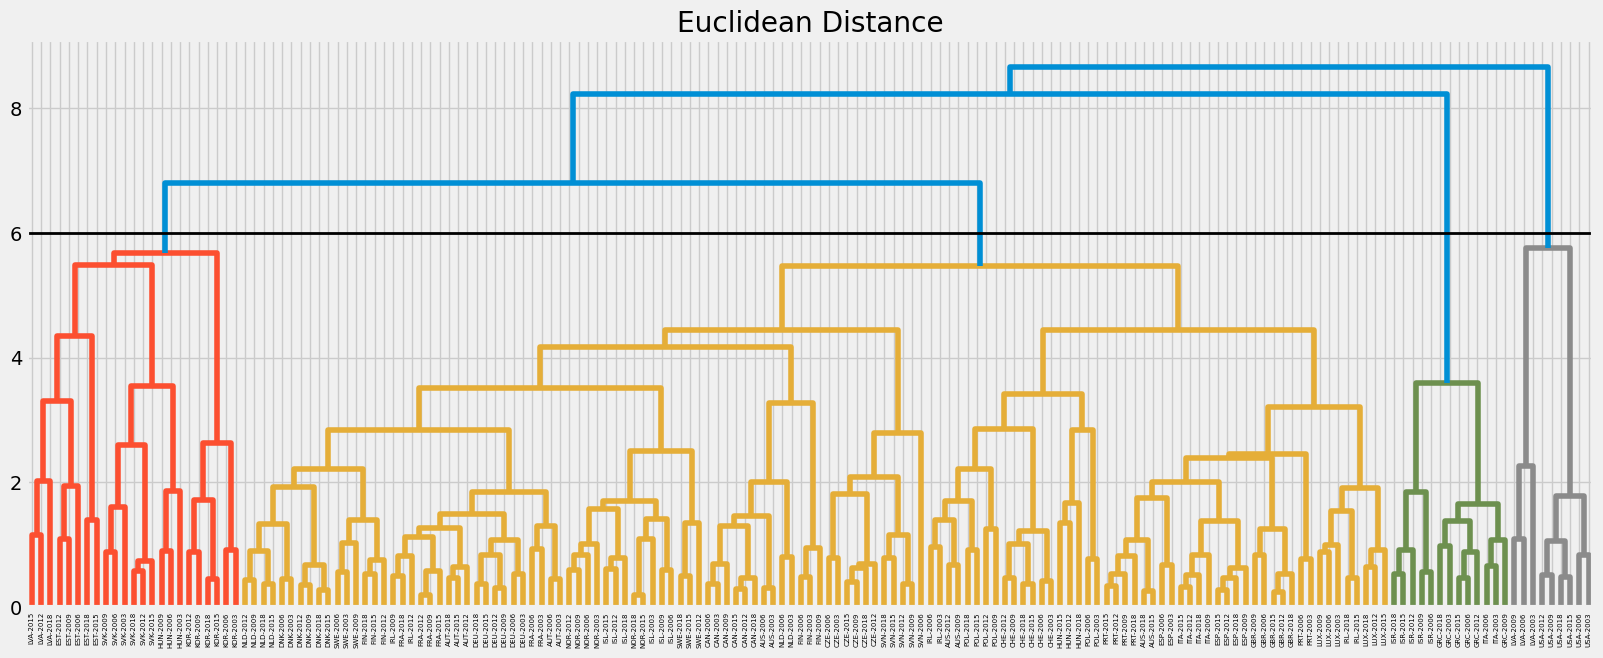


group 1
['LVA-2003' 'LVA-2006' 'LVA-2009' 'USA-2003' 'USA-2006' 'USA-2009'
 'USA-2012' 'USA-2015' 'USA-2018']


group 2
['GRC-2003' 'GRC-2006' 'GRC-2009' 'GRC-2012' 'GRC-2015' 'GRC-2018'
 'ISR-2006' 'ISR-2009' 'ISR-2012' 'ISR-2015' 'ISR-2018' 'ITA-2003'
 'ITA-2006']


group 3
['AUS-2003' 'AUS-2006' 'AUS-2009' 'AUS-2012' 'AUS-2015' 'AUS-2018'
 'AUT-2003' 'AUT-2006' 'AUT-2012' 'AUT-2015' 'AUT-2018' 'CAN-2003'
 'CAN-2006' 'CAN-2009' 'CAN-2012' 'CAN-2015' 'CAN-2018' 'CZE-2003'
 'CZE-2006' 'CZE-2009' 'CZE-2012' 'CZE-2015' 'CZE-2018' 'DNK-2003'
 'DNK-2006' 'DNK-2009' 'DNK-2012' 'DNK-2015' 'DNK-2018' 'FIN-2003'
 'FIN-2006' 'FIN-2009' 'FIN-2012' 'FIN-2015' 'FIN-2018' 'FRA-2003'
 'FRA-2006' 'FRA-2009' 'FRA-2012' 'FRA-2015' 'FRA-2018' 'DEU-2003'
 'DEU-2006' 'DEU-2009' 'DEU-2012' 'DEU-2015' 'DEU-2018' 'HUN-2012'
 'HUN-2015' 'HUN-2018' 'ISL-2003' 'ISL-2006' 'ISL-2009' 'ISL-2012'
 'ISL-2015' 'ISL-2018' 'IRL-2003' 'IRL-2006' 'IRL-2009' 'IRL-2012'
 'IRL-2015' 'IRL-2018' 'ITA-2009' 'ITA-2012' 'ITA-20

In [ ]:
# perform hierarchical clustering
lbls = np.array(bestmodel_df.index)

cluster = linkage(bestmodel_df, method ='complete',metric = "euclidean")
plt.figure(figsize=(18, 7))
dendrogram(cluster,
            orientation='top',
            labels=lbls,
            distance_sort='descending')
plt.axhline(6,c="black",linewidth = 2)
plt.title("Euclidean Distance")
plt.show()
print()

# print out the clusters, using K=4
labels = fcluster(cluster, t=6.0, criterion='distance')
for k in np.arange(1,1+len(np.unique(labels))):
  print("group",k)
  print(bestmodel_df[labels==k].index.values)
  print('\n')

---